# <center>Metody Numeryczne</center>

# Laboratorium 5: Równania liniowe MxN


**Wykonał:** Kacper Kiełbasa

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, w szczególności z wykorzystaniem rzadkich macierzy prostokątnych.

Dana jest prostokątna macierz $\mathbf{A}$ o wymiarach $m \times n$ oraz wektor kolumnowy $\mathbf{b}$ o wymiarach $m \times 1$. Należy rozwiązać układ równań postaci:
 
$$
\mathbf{Ax}=\mathbf{b}
$$
  
gdzie:
- $\mathbf{A}$ - macierz współczynników z lewej strony równania, 
- $\mathbf{x}$ - wektor zmiennych,
- $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania wykorzystywać będziemy residuum (ang. *residual*):

$$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- Do wykonania analizy zużycia pamięci potrzebna jest biblioteka [*memory_profiler*](https://pypi.org/project/memory-profiler/), która do poprawnego działania wymaga doinstalowania pakietu [*setuptools*](https://pypi.org/project/setuptools/). Po instalacji bibliotek może wystąpić błąd związany z brakiem modułu *distutils*. Należy go zignorować i przeładować okno VSCode (lub zrestartować kernela).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [1]:
# !python -m pip install numpy scipy matplotlib memory_profiler setuptools

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from typing import Tuple, List, Callable

%load_ext memory_profiler

---

### **Zadanie 1.**

Zdefiniuj funkcję *`spare_matrix_Abt()`* generującą wektor $m$-wymiarowy $\mathbf{t}$, którego wartości należą do przedziału $[0,1]$ (za pomocą funkcji [`np.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)). Na podstawie tego wektora funkcja powinna zwracać:
- $\mathbf{b}$ - wektor $m$-wymiarowy, którego wartości dane są funkcją $\cos(4t)$,
- $\mathbf{A}$ - macierz postaci: 

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
$$  

> **Wskazówka:** Do definicji macierzy $\mathbf{A}$ można użyć funkcji [`np.vander()`](https://numpy.org/doc/stable/reference/generated/numpy.vander.html) z odpowiednio dobranymi parametrami.

In [ ]:
def spare_matrix_Abt(m: int, n: int) -> tuple[np.ndarray, np.ndarray] | None:
    if type(m) != int or type(n) != int or m <= 0 or n <= 0:
        return None

    t = np.linspace(0, 1, m)
    b = np.cos(4 * t)

    A = np.vander(t, N=n, increasing=True)
    
    return A, b

---

### **Zadanie 2.**

Korzystając z funkcji zaimplementowanej w **Zadaniu 1.**, oraz mając dane $m = 50$ i $n = 12$, rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:

$$
\left[
\begin{matrix}
    1       & t_0      & t_{0}^{2}    & \cdots  & t_{0}^{n-1}   \\
    1       & t_1      & t_{1}^{2}    & \cdots  & t_{1}^{n-1}   \\
    1       & t_2      & t_{2}^{2}    & \cdots  & t_{2}^{n-1}   \\
    \vdots  & \vdots   & \vdots       & \ddots  & \vdots        \\
    1       & t_{m-1}  & t_{m-1}^{2}  & \cdots  & t_{m-1}^{n-1} 
\end{matrix}
\right]
\left[
\begin{matrix}
    x_0    \\
    x_1    \\
    x_2    \\
    \vdots \\
    x_{n-1}
\end{matrix}
\right]
=
\left[
\begin{matrix}
    b_0    \\
    b_1    \\
    b_2    \\
    \vdots \\
    b_{m-1}
\end{matrix}
\right]
$$

za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ i stosując funkcję [`np.linalg.solve()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html). Aby wyznaczyć $\mathbf{A}^{\mathrm{T}}\mathbf{A}$ oraz $\mathbf{A}^{\mathrm{T}}\mathbf{b}$ zaimplementuj funkcję *`square_from_rectan()`*.

2. Użycia dedykowanej metody z biblioteki numpy do rozwiązywania problemu najmniejszych kwadratów&mdash;funkcji [`np.linalg.lstsq()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html).  

3. Rozkładu QR podanego na wykładzie i wyznaczenia rozwiązania dla układu równań z macierzą trójkątną. Użyć należy funkcji [`np.linalg.qr()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) i [`sp.linalg.solve_triangular()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html).

4. Rozkładu SVD podanego na wykładzie. Użyć należy funkcji [`np.linalg.svd()`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html).

Po zaimplementowaniu powyższych metod przeprowadź profilowanie kodu w celu analizy czasu wykonania oraz zużycia pamięci każdej z nich. Porównaj jakość otrzymanych wyników.

In [ ]:
def residual_norm(A: np.ndarray, x: np.ndarray, b: np.ndarray) -> float | None:
    return np.linalg.norm(b - (A @ x))


# 1
def square_from_rectan(
    A: np.ndarray, b: np.ndarray
) -> tuple[np.ndarray, np.ndarray] | None:

    if not (isinstance(A, np.ndarray) and isinstance(b, np.ndarray)):
            return None
    
    try:
        if A.ndim != 2 or b.ndim != 1:
            return None
        
        if A.shape[0] != b.shape[0]: # A(m,n), b(m,)
            return None
        
        
        A_new = A.T @ A
        b_new = A.T @ b

        return A_new, b_new

    except (AttributeError, ValueError, TypeError):
        return None


# 2
def solve_lstsq(A: np.ndarray, b: np.ndarray):
    return np.linalg.lstsq(A, b, rcond=None)[0]
    # ^ lstsq zwraca krotke a nas interesuje tylko pierwszy element, czyli rozwiazanie x


# 3
def solve_qr(A: np.ndarray, b: np.ndarray):
    try:
        Q, R = np.linalg.qr(A)
        n = A.shape[1] # n = 12
        
        # bierzemy tylko kwadratową część R (12, 12)
        R_sq = R[:n, :n] 
        # bierzemy tylko pasującą część b_p (pierwsze 12 elementów)
        b_p = (Q.T @ b)[:n]
        
        # Pamiętaj, aby zaimportować scipy.linalg jako sp_linalg
        x = sp.linalg.solve_triangular(R_sq, b_p, lower=False) 
        return x
    except (np.linalg.LinAlgError, ValueError, TypeError):
        return None


# 4
def solve_svd(A: np.ndarray, b: np.ndarray):
    u, s, h = np.linalg.svd(A, full_matrices=False)
    
    s_inv_d = np.diag(1.0/s)

    b_p = u.T @ b

    b_d_p = s_inv_d @ b_p
    
    return h.T @ b_d_p

# 0 - dla porównania 
def solve_normal_eq(A: np.ndarray, b: np.ndarray) -> np.ndarray | None:
    """Metoda 1: Równania normalne (A^T*A*x = A^T*b)"""
    A_sq, b_sq = square_from_rectan(A, b)
    if A_sq is None:
        return None
    try:
        x = np.linalg.solve(A_sq, b_sq)
        return x
    except np.linalg.LinAlgError:
        return None

In [ ]:
m = 50
n = 12

np.random.seed(42)

A = np.random.rand(m, n)
b = np.random.rand(m)

print(f"Porównanie metod dla macierzy A ({m}x{n})\n")

time_solve = []
mem_solve = []
norm_solve = []
nazwy_metod = ["Równania normalne", "np.linalg.lstsq", "QR", "SVD"]


# 1
print("normal equation/porównanie")
saved_timing_1 = %timeit -r 5 -n 10 -o solve_normal_eq(A, b)
time_solve.append(saved_timing_1.average)
mem_temp_1 = %memit -o solve_normal_eq(A, b)
mem_solve.append(mem_temp_1)
x_1 = solve_normal_eq(A, b)
norm_solve.append(residual_norm(A, x_1, b))

# 2
print("np.linalg.lstsq")
saved_timing_2 = %timeit -r 5 -n 10 -o solve_lstsq(A, b)
time_solve.append(saved_timing_2.average)
mem_temp_2 = %memit -o solve_lstsq(A, b)
mem_solve.append(mem_temp_2)
x_2 = solve_lstsq(A, b)
norm_solve.append(residual_norm(A, x_2, b))

# 3
print("qr")
saved_timing_3 = %timeit -r 5 -n 10 -o solve_qr(A, b)
time_solve.append(saved_timing_3.average)
mem_temp_3 = %memit -o solve_qr(A, b)
mem_solve.append(mem_temp_3)
x_3 = solve_qr(A, b)
norm_solve.append(residual_norm(A, x_3, b))

# 4
print("svd")
saved_timing_4 = %timeit -r 5 -n 10 -o solve_svd(A, b)
time_solve.append(saved_timing_4.average)
mem_temp_4 = %memit -o solve_svd(A, b)
mem_solve.append(mem_temp_4)
x_4 = solve_svd(A, b)
norm_solve.append(residual_norm(A, x_4, b))

print("\nZESTAWIENIE")
print("Wyznaczona norma residuum dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {norm_solve[0]:.3e}")
print(f"Druga metoda    :  {norm_solve[1]:.3e}")
print(f"Trzecia metoda  :  {norm_solve[2]:.3e}")
print(f"Czwarta metoda  :  {norm_solve[3]:.3e}")

print("")
print("Czas wykonywania dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {time_solve[0] * 1000:.6f} ms")
print(f"Druga metoda    :  {time_solve[1] * 1000:.6f} ms")
print(f"Trzecia metoda  :  {time_solve[2] * 1000:.6f} ms")
print(f"Czwarta metoda  :  {time_solve[3] * 1000:.6f} ms")
print("")

print("Użyta pamięć dla kolejnych metod obliczeń:")
print(f"Pierwsza metoda :  {str(mem_solve[0])}")
print(f"Druga metoda    :  {str(mem_solve[1])}")
print(f"Trzecia metoda  :  {str(mem_solve[2])}")
print(f"Czwarta metoda  :  {str(mem_solve[3])}")

Start: Porównanie 4 metod dla macierzy A (50x12)

normal equation/porównanie
11 μs ± 3.07 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 180.19 MiB, increment: 0.02 MiB
np.linalg.lstsq
20.1 μs ± 2.47 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 180.19 MiB, increment: 0.00 MiB
qr
24 μs ± 12.4 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 180.19 MiB, increment: 0.00 MiB
svd
32.2 μs ± 3.6 μs per loop (mean ± std. dev. of 5 runs, 10 loops each)
peak memory: 180.19 MiB, increment: 0.00 MiB

ZESTAWIENIE
Wyznaczona norma residuum dla kolejnych metod obliczeń:
Pierwsza metoda :  1.817e+00
Druga metoda    :  1.817e+00
Trzecia metoda  :  1.817e+00
Czwarta metoda  :  1.817e+00

Czas wykonywania dla kolejnych metod obliczeń:
Pierwsza metoda :  0.011023 ms
Druga metoda    :  0.020055 ms
Trzecia metoda  :  0.024026 ms
Czwarta metoda  :  0.032190 ms

Użyta pamięć dla kolejnych metod obliczeń:
Pierwsza metoda :  peak memory: 180.19 M

---

### **Zadanie 3.**

Dane są wydatki ($\mathbf{w}$) oraz dochody ($\mathbf{d}$) dla pewnego gospodarstwa:

$$
\begin{align*}
    \mathbf{w} &= (140, 190, 250, 270, 290, 310, 340, 360, 420, 390)\\
    \mathbf{d} &= (210, 270, 290, 310, 370, 400, 450, 480, 510, 520)
\end{align*}
$$


1. Utwórz regresję liniową zależności wydatków od dochodów.

2. Przeanalizuj jaki jest błąd uzyskanej prostej względem danych. Czy istnieje możliwość uzyskania lepszego wyniku?

> **Wskazówka:** W celu wyznaczenia współczynników wykorzystaj niniejszą informację nt. regresji liniowej [[link](https://en.wikipedia.org/wiki/Simple_linear_regression#Formulation_and_computation)].


In [3]:
# Dane do Zadania 3.
w = np.array([140, 190, 250, 270, 290, 310, 340, 360, 420, 390])
d = np.array([210, 270, 290, 310, 370, 400, 450, 480, 510, 520])

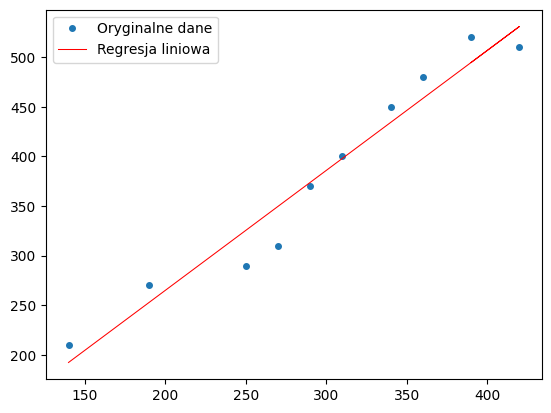

In [17]:
# ===== Twoja implementacja tutaj =====
A = np.vstack([w, np.ones(len(w))]).T

m, c = np.linalg.lstsq(A, d)[0]
m, c

plt.plot(w, d, 'o', label='Oryginalne dane', markersize=4)
plt.plot(w, m*w + c, 'r', label='Regresja liniowa', linewidth=0.75)
plt.legend()
plt.show()

---

### **Zadanie 4.**

W rzeczywistych problemach często dokładna postać analityczna analizowanego procesu nie jest znana, a dostępne są jedynie jego dane wejściowe i wyjściowe. W tym zadaniu przeprowadzona zostanie symulacja takiego scenariusza oraz opisany zostanie problem poszukiwania modelu analitycznego jak najdokładniej odzwierciedlającego analizowany proces.

<br>

**Punkt 1. Symulacja danych pomiarowych.**

Zdefiniowany jest rzeczywisty proces opisany następującą zależnością:

$$
y = 2 + x_1 - 0.5x_2 + \epsilon
$$

gdzie:
- $y$ - dane wyjściowe procesu,
- $x_1$, $x_2$ - mierzalne zmienne niezależne, które wpływają na proces,
- $\epsilon$ - zakłócenie procesu.

Należy przygotować dane procesu, które posłużą w Punkcie 2. do jego modelowania.

1. Przy użyciu funkcji [`np.random.normal()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj wektory kolumnowe danych wejściowych procesu ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz wektor zakłóceń ($\mathbf{\epsilon}$) o wymiarze $(100,1)$. Każdy z nich powinien charakteryzować się średnią równą $0$ oraz odchyleniem standardowym równym $1$.

2. Oblicz wartości wektora $\mathbf{y}$ (dane wyjściowe procesu), korzystając z podanego wzoru opisującego proces oraz wektorów zdefiniowanych w poprzednim podpunkcie.

<br>

**Punkt 2. Modelowanie procesu.**


W Punkcie 1. opisany został rzeczywisty proces, na podstawie którego przygotowane zostały dane do analizy. W tym punkcie natomiast przyjmuje się założenie, że dokładne równanie procesu ($y = ...$) oraz wektor szumów ($\mathbf{\epsilon}$) nie są znane. Danymi, na których przeprowadzone będzie modelowanie, są jedynie wektory danych wejściowych ($\mathbf{x}_1$, $\mathbf{x}_2$) oraz danych wyjściowych ($\mathbf{y}$).

Wszystkie modele używane w ramach tego zadania będą postaci:

$$
\hat{y} \sim a + z_1 + z_2 + ... + z_n
$$

gdzie:
- $\hat{y}$ - przybliżenie modelowanego procesu,
- $a$ - wyraz wolny,
- $z_1 + z_2 + ... + z_n$ - zmienne niezależne, których ilość dobiera się na podstawie dostępnych danych, tak aby otrzymać jak najlepszy model.

Celem zadania jest wyznaczenie wektora współczynników [regresji liniowej](https://en.wikipedia.org/wiki/Linear_regression) $\mathbf{b}$, co sprowadza się do rozwiązania równania:

$$
\mathbf{y} = b_0 \cdot \mathbf{1} + b_1 \mathbf{z}_1 + b_2 \mathbf{z}_2 + ... + b_n \mathbf{z}_{n}
$$

które w postaci macierzowej przybiera postać:

$$
\mathbf{Z} \mathbf{b} = \mathbf{y}
$$

gdzie:
- $\mathbf{Z}$ - macierz rzeczywistych danych wejściowych do procesu,
- $\mathbf{b}$ - wektor współczynników regresji liniowej do wyliczenia,
- $\mathbf{y}$ - wektor rzeczywistych danych wyjściowych z procesu.

<br>

W ramach zadania przeanalizowane i porównane zostaną poniższe modele:
1. $\hat{y} \sim a + x_1$   
2. $\hat{y} \sim a + x_2$
3. $\hat{y} \sim a + x_1 + x_2$
4. $\hat{y} \sim a + x_1 + x_2 + x_1x_2$

Dla każdego z modeli zdefiniowanych powyżej:

1. Rozpisz analitycznie równanie opisujące model, analogicznie jak w opisie powyżej (np. $\mathbf{y} = b_0 \cdot \mathbf{1} + ... $). Opisz co oznaczają poszczególne elementy wzoru. 

2. Przedstaw otrzymane równanie w formie macierzowej i zdefiniuj $\mathbf{Z}$, $\mathbf{b}$ oraz $\mathbf{y}$. Podaj wymiary każdego z nich oraz napisz z czego wynikają.

3. Wyznacz wektor współczynników regresji liniowej ($\mathbf{b}$) wykorzystując rozkład QR.

4. Przedstaw na wykresie rzeczywiste wartości wyjściowe procesu ($\mathbf{y}$) oraz wyznaczoną funkcję regresji (pomiń ten podpunkt dla ostatniego modelu).


Po przeprowadzeniu analizy dla wszystkich modeli przeanalizuj znanymi metrykami otrzymane wyniki i je opisz.


> **Wskazówka:** Macierz $\mathbf{Z}$ składa się z konkatenacji wektorów kolumnowych zmiennych niezależnych oraz wektora kolumnowego wypełnionego jedynkami, odpowiadającego wyrazowi wolnemu w modelu ($\mathbf{Z} = [\mathbf{1}, \mathbf{z}_1, ... , \mathbf{z}_n]$). Do utworzenia takiej macierzy można posłużyć się funkcją [`np.concatenate()`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).
>
> Płaszczyznę regresji dla trzeciego modelu można wyrysować stosując [`np.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) oraz [`plot_wireframe()`](https://matplotlib.org/stable/plot_types/3D/wire3d_simple.html).
>
> Rozkład QR w skrócie: dane jest równanie: $\mathbf{A}\mathbf{x} = \mathbf{b}$. Jeżeli zdefiniujemy dodatkowo $\mathbf{A} = \mathbf{Q} \mathbf{R}$ to zachodzi: $\mathbf{R}\mathbf{x} = \mathbf{Q}^T\mathbf{b}$.

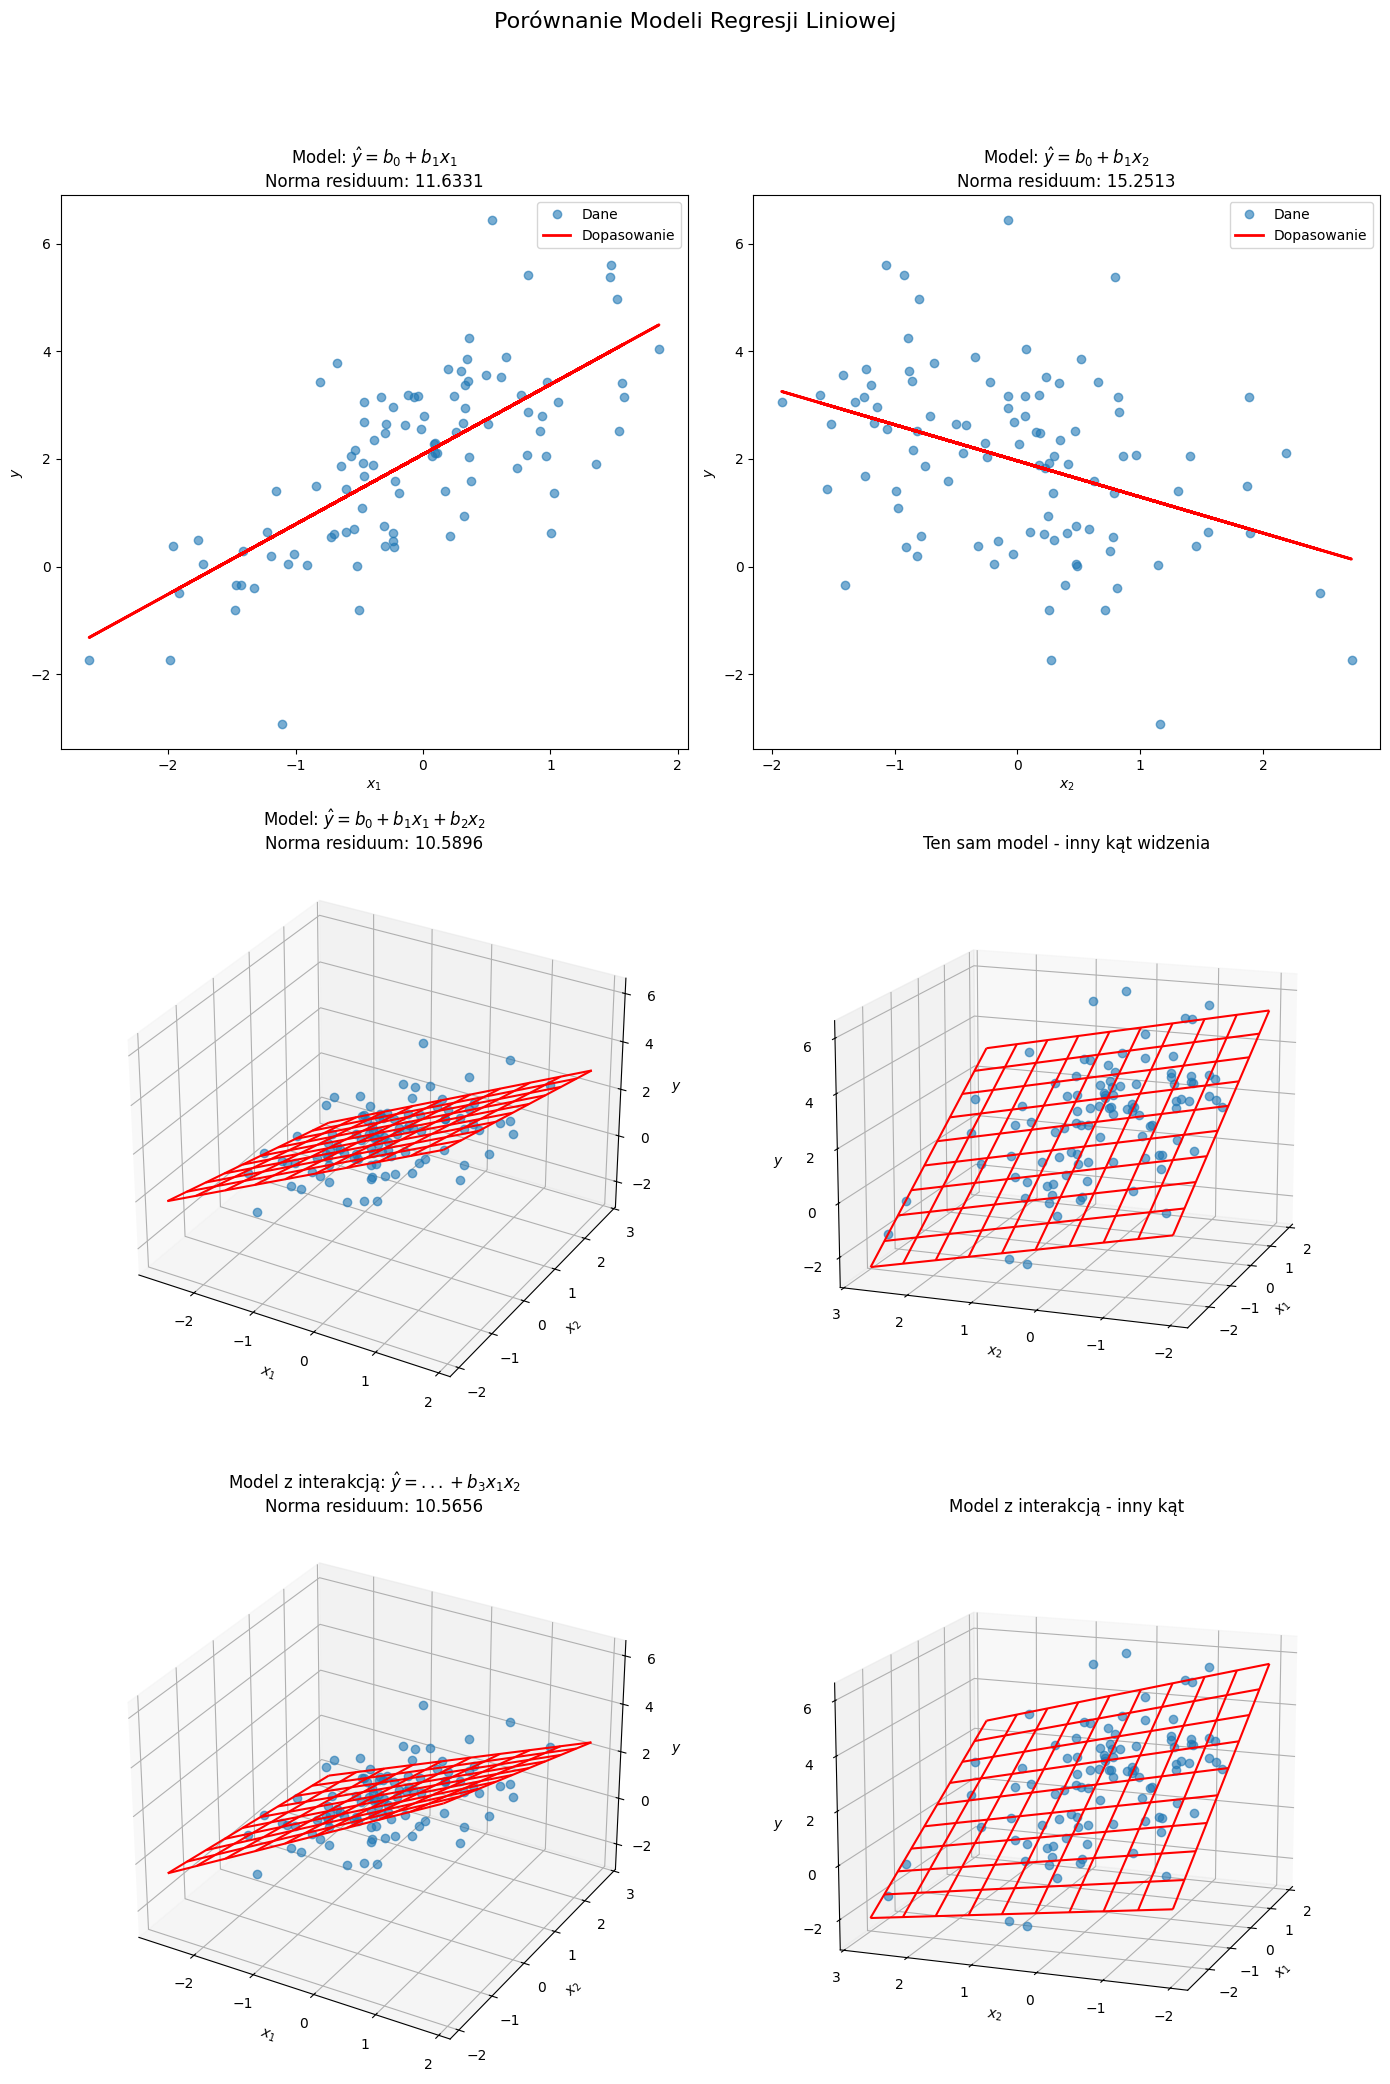

In [6]:
import scipy.linalg as la  # <- Poprawka błędu 'la'

def fit_model_qr(X_design, y_target):
    Q, R = np.linalg.qr(X_design)

    qty = Q.T @ y_target
    coeffs = la.solve_triangular(R, qty) # <- Użycie 'la'

    y_pred = X_design @ coeffs
    residuals = y_target - y_pred
    residual_norm = np.linalg.norm(residuals)

    return coeffs, y_pred, residual_norm


np.random.seed(42)
n_samples = 100

x1 = np.random.normal(loc=0.0, scale=1.0, size=(n_samples, 1))
x2 = np.random.normal(loc=0.0, scale=1.0, size=(n_samples, 1))
noise = np.random.normal(loc=0.0, scale=1.0, size=(n_samples, 1))

y = 2 + x1 - 0.5 * x2 + noise

ones = np.ones((n_samples, 1))


# 1: y ~ b0 + b1*x1
X_model1 = np.concatenate([ones, x1], axis=1)

# 2: y ~ b0 + b1*x2
X_model2 = np.concatenate([ones, x2], axis=1)

# 3: y ~ b0 + b1*x1 + b2*x2
X_model3 = np.concatenate([ones, x1, x2], axis=1)

# 4: y ~ b0 + b1*x1 + b2*x2 + b3*x1*x2 
X_model4 = np.concatenate([ones, x1, x2, x1 * x2], axis=1)


fig = plt.figure(figsize=(14, 21)) 
fig.suptitle('Porównanie Modeli Regresji Liniowej', fontsize=16, y=1.02)

ax0 = fig.add_subplot(3, 2, 1)
ax1 = fig.add_subplot(3, 2, 2)
ax2 = fig.add_subplot(3, 2, 3, projection='3d')
ax3 = fig.add_subplot(3, 2, 4, projection='3d')
ax4 = fig.add_subplot(3, 2, 5, projection='3d')
ax5 = fig.add_subplot(3, 2, 6, projection='3d')

coeffs1, y_pred1, norm1 = fit_model_qr(X_model1, y)

# 1
ax0.plot(x1, y, 'o', alpha=0.6, label='Dane')
ax0.plot(x1, y_pred1, 'r', linewidth=2, label='Dopasowanie')
ax0.set_title(rf'Model: $\hat{{y}} = b_0 + b_1 x_1$' + f'\nNorma residuum: {norm1:.4f}')
ax0.set(xlabel='$x_1$', ylabel='$y$')
ax0.legend()

coeffs2, y_pred2, norm2 = fit_model_qr(X_model2, y)

# 2
ax1.plot(x2, y, 'o', alpha=0.6, label='Dane')
ax1.plot(x2, y_pred2, 'r', linewidth=2, label='Dopasowanie')
ax1.set_title(rf'Model: $\hat{{y}} = b_0 + b_1 x_2$' + f'\nNorma residuum: {norm2:.4f}')
ax1.set(xlabel='$x_2$', ylabel='$y$')
ax1.legend()

# 3
x_surf, y_surf = np.meshgrid(np.linspace(x1.min(), x1.max(), 10),
                             np.linspace(x2.min(), x2.max(), 10))

coeffs3, _, norm3 = fit_model_qr(X_model3, y)
z_surf3 = coeffs3[0] + coeffs3[1] * x_surf + coeffs3[2] * y_surf

# 3a
ax2.plot(x1.flatten(), x2.flatten(), y.flatten(), 'o', alpha=0.6)
ax2.plot_wireframe(x_surf, y_surf, z_surf3, color='r')
ax2.set_title(rf'Model: $\hat{{y}} = b_0 + b_1 x_1 + b_2 x_2$' + f'\nNorma residuum: {norm3:.4f}')
ax2.set(xlabel='$x_1$', ylabel='$x_2$', zlabel='$y$')

# 3b
ax3.plot(x1.flatten(), x2.flatten(), y.flatten(), 'o', alpha=0.6)
ax3.plot_wireframe(x_surf, y_surf, z_surf3, color='r')
ax3.set_title('Ten sam model - inny kąt widzenia')
ax3.view_init(elev=15, azim=200) # Jawne nazwy argumentów
ax3.set(xlabel='$x_1$', ylabel='$x_2$', zlabel='$y$')

# 4
coeffs4, _, norm4 = fit_model_qr(X_model4, y)
z_surf4 = coeffs4[0] + coeffs4[1] * x_surf + coeffs4[2] * y_surf + coeffs4[3] * x_surf * y_surf

# 4a
ax4.plot(x1.flatten(), x2.flatten(), y.flatten(), 'o', alpha=0.6)
ax4.plot_wireframe(x_surf, y_surf, z_surf4, color='r')
ax4.set_title(rf'Model z interakcją: $\hat{{y}} = ... + b_3 x_1 x_2$' + f'\nNorma residuum: {norm4:.4f}')
ax4.set(xlabel='$x_1$', ylabel='$x_2$', zlabel='$y$')

# 4b
ax5.plot(x1.flatten(), x2.flatten(), y.flatten(), 'o', alpha=0.6)
ax5.plot_wireframe(x_surf, y_surf, z_surf4, color='r')
ax5.set_title('Model z interakcją - inny kąt')
ax5.view_init(elev=15, azim=200)
ax5.set(xlabel='$x_1$', ylabel='$x_2$', zlabel='$y$')

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)

In [ ]:
# zawartość main.py
import numpy as np


def spare_matrix_Abt(m: int, n: int) -> tuple[np.ndarray, np.ndarray] | None:
    """Funkcja tworząca zestaw składający się z macierzy A (m,n) i
    wektora b (m,) na podstawie pomocniczego wektora t (m,).

    Args:
        m (int): Liczba wierszy macierzy A.
        n (int): Liczba kolumn macierzy A.

    Returns:
        (tuple[np.ndarray, np.ndarray]):
            - Macierz A o rozmiarze (m,n),
            - Wektor b (m,).
        Jeżeli dane wejściowe są niepoprawne funkcja zwraca `None`.
    """

    if type(m) != int or type(n) != int or m <= 0 or n <= 0:
        return None

    t = np.linspace(0, 1, m)
    b = np.cos(4 * t)

    A = np.vander(t, N=n, increasing=True)
    
    return A, b


def square_from_rectan(
    A: np.ndarray, b: np.ndarray
) -> tuple[np.ndarray, np.ndarray] | None:
    """Funkcja przekształcająca układ równań z prostokątną macierzą współczynników
    na kwadratowy układ równań.
    A^T * A * x = A^T * b  ->  A_new * x = b_new

    Args:
        A (np.ndarray): Macierz A (m,n) zawierająca współczynniki równania.
        b (np.ndarray): Wektor b (m,) zawierający współczynniki po prawej stronie równania.

    Returns:
        (tuple[np.ndarray, np.ndarray]):
            - Macierz A_new o rozmiarze (n,n),
            - Wektor b_new (n,).
        Jeżeli dane wejściowe są niepoprawne funkcja zwraca `None`.
    """
    
    try:
        if A.ndim != 2 or b.ndim != 1:
            return None
        
        if A.shape[0] != b.shape[0]: # A(m,n), b(m,)
            return None
        
        
        A_new = A.T @ A
        b_new = A.T @ b

        return A_new, b_new

    except (AttributeError, ValueError, TypeError):
        return None


def residual_norm(A: np.ndarray, x: np.ndarray, b: np.ndarray) -> float | None:
    """Funkcja obliczająca normę residuum dla równania postaci:
    Ax = b

    Args:
        A (np.ndarray): Macierz A (m,n) zawierająca współczynniki równania.
        x (np.ndarray): Wektor x (n,) zawierający rozwiązania równania.
        b (np.ndarray): Wektor b (m,) zawierający współczynniki po prawej stronie równania.

    Returns:
        (float): Wartość normy residuum dla podanych parametrów.
        Jeżeli dane wejściowe są niepoprawne funkcja zwraca `None`.
    """
    if not (isinstance(A, np.ndarray) and 
            isinstance(x, np.ndarray) and 
            isinstance(b, np.ndarray)):
        return None

    try:
        if A.ndim != 2 or x.ndim != 1 or b.ndim != 1:
            return None
        
        if A.shape[0] != b.shape[0]: # A(m,n), b(m,)
            return None
        
        if A.shape[1] != x.shape[0]: # A(m,n), x(n,)
            return None

        return np.linalg.norm(b - (A @ x))
    
    except (ValueError, TypeError, np.linalg.LinAlgError):
        return None